In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.datasets import mnist
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, BatchNormalization, Dropout, Reshape, LSTM, TimeDistributed
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical, np_utils
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.utils import shuffle

In [2]:
data = pd.read_csv('A_Z_Handwritten_Data.csv').astype('float32')
data.head(10)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
X = data.drop('0',axis = 1)
y = data['0']

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [5]:
x_train = np.reshape(x_train.values, (x_train.shape[0], 28,28))
x_test = np.reshape(x_test.values, (x_test.shape[0], 28,28))

print("Shape of Training data: ", x_train.shape)
print("Shape of Testing data: ", x_test.shape)

Shape of Training data:  (335205, 28, 28)
Shape of Testing data:  (37245, 28, 28)


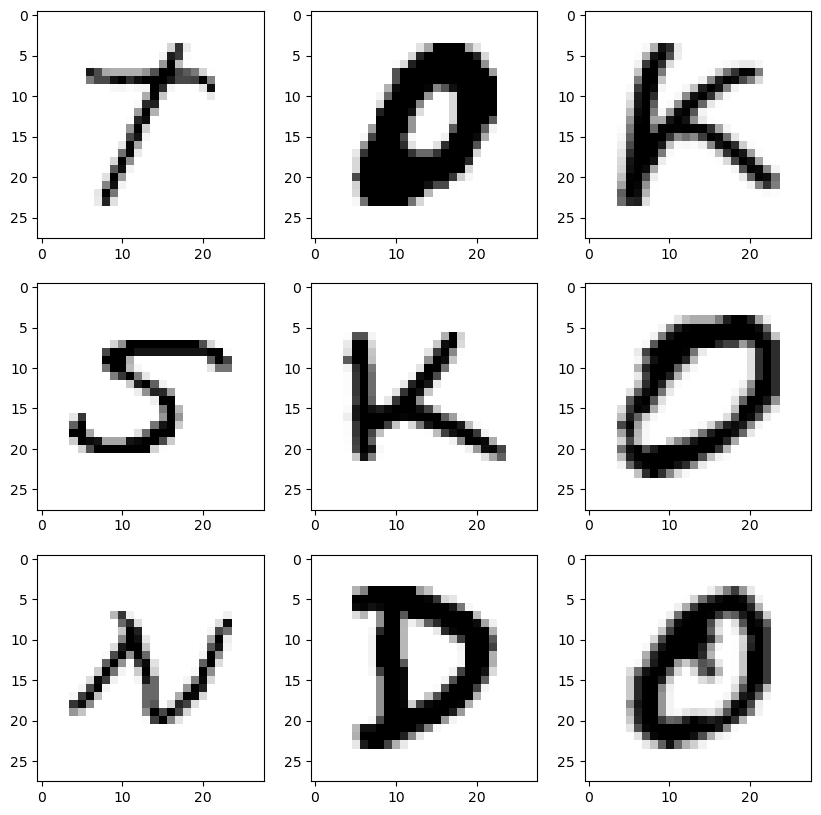

In [6]:
import cv2
shuffle_data = shuffle(x_train)

fig, axes = plt.subplots(3,3, figsize = (10,10))
axes = axes.flatten()

for i in range(9):
    _, shu = cv2.threshold(shuffle_data[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuffle_data[i], (28,28)), cmap="Greys")
plt.show()

In [7]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2],1)

print("New shape of training data: ", x_train.shape)
print("New shape of testing data: ", x_test.shape)

New shape of training data:  (335205, 28, 28, 1)
New shape of testing data:  (37245, 28, 28, 1)


In [8]:
import tensorflow
from tensorflow.keras.utils import to_categorical

y_training = to_categorical(y_train, num_classes = 26, dtype='int')
y_testing = to_categorical(y_test, num_classes = 26, dtype='int')

print("New shape of training labels: ", y_training.shape)
print("New shape of testing labels: ", y_testing.shape)

New shape of training labels:  (335205, 26)
New shape of testing labels:  (37245, 26)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [10]:
model = Sequential()

# Convolutional layers with max pooling
model.add(Conv2D(256, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(2, 2))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))

# Flatten layer to convert the output to 1D
model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation="relu"))
model.add(Dense(256, activation="relu"))

# Output layer with softmax activation for multi-class classification
model.add(Dense(26, activation="softmax"))

In [11]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_training, epochs=10,  validation_data = (x_test,y_testing))

Epoch 1/7
10476/10476 [==============================] - 2774s 265ms/step - loss: 0.1984 - accuracy: 0.9454 - val_loss: 0.1053 - val_accuracy: 0.9701
Epoch 2/7
10476/10476 [==============================] - 1178s 112ms/step - loss: 0.1041 - accuracy: 0.9712 - val_loss: 0.1108 - val_accuracy: 0.9708
Epoch 3/7
10476/10476 [==============================] - 1288s 123ms/step - loss: 0.0910 - accuracy: 0.9752 - val_loss: 0.1003 - val_accuracy: 0.9742
Epoch 4/7
 9324/10476 [=========================>....] - ETA: 5:03 - loss: 0.0847 - accuracy: 0.9777

##### !pip install pyttsx3

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)        0

In [14]:
model.save(r'handwritten_character_recog_model.h5')

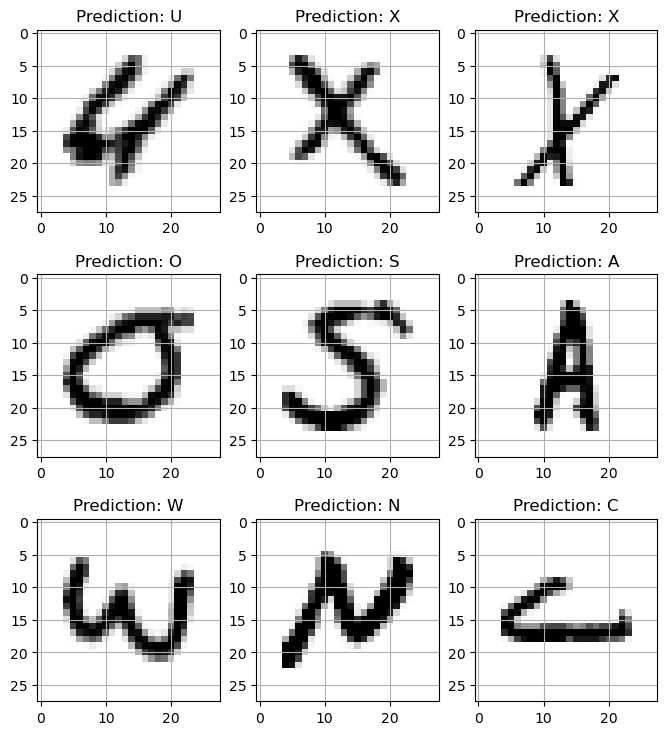

In [15]:
words = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    image = np.reshape(x_test[i], (28,28))
    ax.imshow(image, cmap="Greys")
    
    pred = words[np.argmax(y_testing[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()

In [16]:
import pyttsx3
text_spech = pyttsx3.init()

In [19]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
 
from keras.models import load_model
model = load_model('handwritten_character_recog_model.h5')
 
words = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',
         18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}
 
image = cv2.imread('B.jpeg')
image_copy = image.copy()
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (400,440))
 
image_copy = cv2.GaussianBlur(image_copy, (7,7), 0)
gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(gray_image, 100, 255, cv2.THRESH_BINARY_INV)
 
final_image = cv2.resize(img_thresh, (28,28))
final_image =np.reshape(final_image, (1,28,28,1))
 
prediction = words[np.argmax(model.predict(final_image))]
 
cv2.putText(image, "Prediction: " + prediction, (20,410), cv2.FONT_HERSHEY_DUPLEX, 1.3, color = (0,255,0))
cv2.imshow('Project handwritten character recognition ',image)
 
cv2.waitKey(0)

cv2.destroyAllWindows()

1/1 [==============================] - 0s 197ms/step
